# **Desafio com aprendizado superevisionado: Regressão**

In [1]:
import numpy as np
import pandas as pd

In [2]:
df = pd.read_csv('dados/insurance.csv',
                    sep=',', encoding='iso-8859-1')

In [3]:
df.head()

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


In [4]:
df.dtypes

age           int64
sex          object
bmi         float64
children      int64
smoker       object
region       object
charges     float64
dtype: object

In [5]:
df2 = pd.DataFrame.copy(df)

In [6]:
df2['sex'].replace({'male':0, 'female': 1}, inplace=True)
df2['smoker'].replace({'no':0, 'yes': 1}, inplace=True)
df2['region'].replace({'southwest':0, 'southeast': 1, 'northwest':2, 'northeast': 3}, inplace=True)


In [7]:
df2.head()

,age,sex,bmi,children,smoker,region,charges
0,19,1,27.900,0,1,0,16884.92400
1,18,0,33.770,1,0,1,1725.55230
2,28,0,33.000,3,0,1,4449.46200
3,33,0,22.705,0,0,2,21984.47061
4,32,0,28.880,0,0,2,3866.85520


**Analise de outlines**

In [8]:
import plotly.express as px

In [9]:
boxplot = px.box(df, y="age")
boxplot.show()

In [10]:
boxplot = px.box(df, y="bmi")
boxplot.show()

In [11]:
boxplot = px.box(df, y="charges")
boxplot.show()

## **Correlação Linear**

In [12]:
df = df2

In [13]:
df.head(2)

,age,sex,bmi,children,smoker,region,charges
0,19,1,27.90,0,1,0,16884.9240
1,18,0,33.77,1,0,1,1725.5523


In [14]:
import matplotlib.pyplot as plt

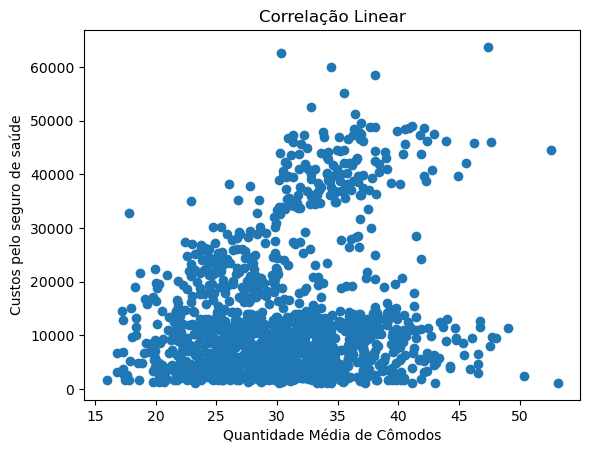

In [15]:
plt.scatter(df.bmi, df.charges)
plt.title('Correlação Linear')
plt.xlabel('Quantidade Média de Cômodos')
plt.ylabel('Custos pelo seguro de saúde')
plt.grid(False)

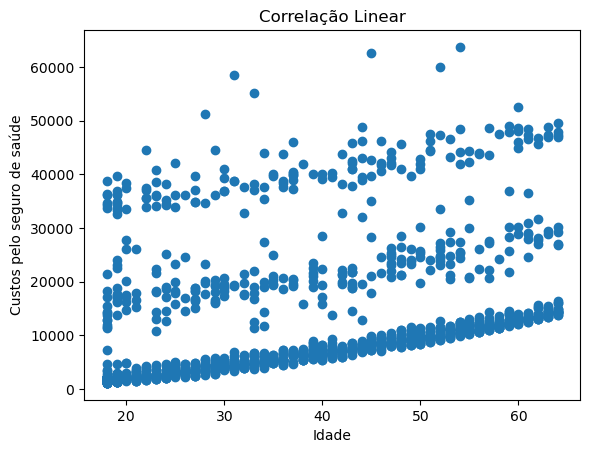

In [16]:
plt.scatter(df.age, df.charges)
plt.title('Correlação Linear')
plt.xlabel('Idade')
plt.ylabel('Custos pelo seguro de saúde')
plt.grid(False)

## **Analise de Normalidade**

**Grafico QQ-Plot**

In [17]:
import scipy.stats as stats

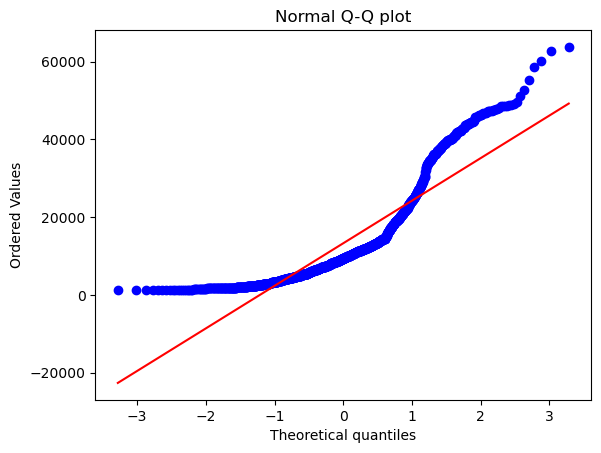

In [18]:
stats.probplot(df['charges'], dist="norm", plot=plt)
plt.title("Normal Q-Q plot")
plt.show()

In [19]:
hist =  px.histogram (df,  x = "charges", nbins=60) 
hist.update_layout(width=800,height=500,title_text='Média dos valores') 
hist.show()

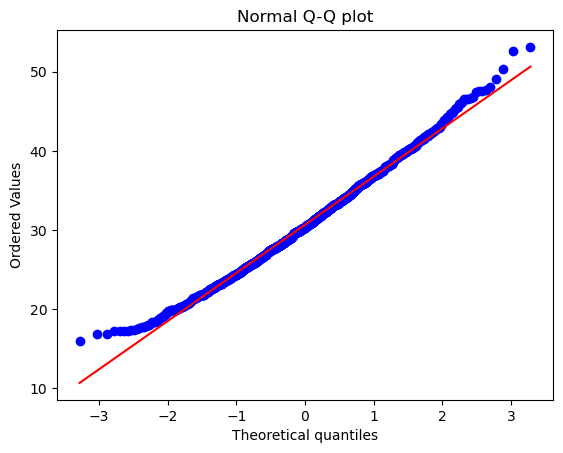

In [20]:
stats.probplot(df['bmi'], dist="norm", plot=plt)
plt.title("Normal Q-Q plot")
plt.show()

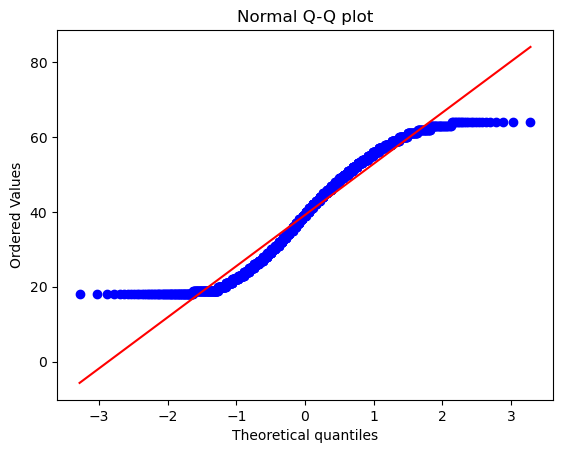

In [21]:
stats.probplot(df['age'], dist="norm", plot=plt)
plt.title("Normal Q-Q plot")
plt.show()

Teste Shapiro-Wilk

Ho = distribuição normal : p > 0.05

Ha = distribuição != normal : p <= 0.05

In [22]:
stats.shapiro(df.charges)

ShapiroResult(statistic=0.8146880865097046, pvalue=1.1505194006561963e-36)

In [23]:
estatistica, p = stats.shapiro(df.age)
print('Estatística do teste: {}'.format(estatistica))
print('p-valor: {}'.format(p))

Estatística do teste: 0.9446989893913269
p-valor: 5.687060076887153e-22


In [24]:
estatistica, p = stats.shapiro(df.bmi)
print('Estatística do teste: {}'.format(estatistica))
print('p-valor: {}'.format(p))

Estatística do teste: 0.9938861727714539
p-valor: 2.6033414542325772e-05


## **Correlação Linear**

Pearson (distribuição normal)

Spearman (distribuição não normal)

Kendall (distribuição não normal com quantidade pequena de amostras)

Ho = não há corrrelação linear: p > 0,05

Ha = existe correlação linear: p <= 0,05

In [25]:
# Spearman
coef,p = stats.spearmanr(df.charges, df.bmi)
print('Coeficiente de correlação: {}'.format(coef))
print('p-valor: {}'.format(p))

Coeficiente de correlação: 0.11939590358331147
p-valor: 1.1926059544526826e-05


In [26]:
correlacoes = df.corr(method='spearman')
correlacoes
# Numero que importa 0.624057 ou MEDV com RM se for maior que o,5 não há correlação linear

,age,sex,bmi,children,smoker,region,charges
age,1.000000,0.020809,0.107736,0.056992,-0.025210,-0.004315,0.534392
sex,0.020809,1.000000,-0.044802,-0.015589,-0.076185,0.004614,-0.009490
bmi,0.107736,-0.044802,1.000000,0.015607,0.002203,-0.152959,0.119396
children,0.056992,-0.015589,0.015607,1.000000,0.016583,-0.010604,0.133339
smoker,-0.025210,-0.076185,0.002203,0.016583,1.000000,0.002155,0.663460
region,-0.004315,0.004614,-0.152959,-0.010604,0.002155,1.000000,0.043531
charges,0.534392,-0.009490,0.119396,0.133339,0.663460,0.043531,1.000000


In [27]:
import seaborn as sns

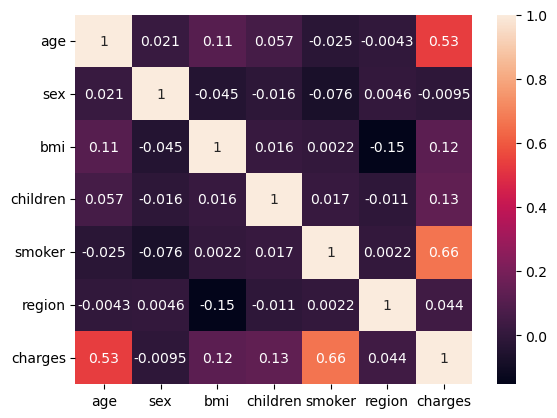

In [28]:
plt.figure()
sns.heatmap(correlacoes, annot=True);
#Quanto mais perto do laranja maior a correlação positiva e quando esta perto do roxo maior a correlação negativa

## **Regressão Linear Simples**

### Valor (charges) em função de (smoker)

In [29]:
df.head(2)

,age,sex,bmi,children,smoker,region,charges
0,19,1,27.90,0,1,0,16884.9240
1,18,0,33.77,1,0,1,1725.5523


In [30]:
x1 = df.iloc[:,4:5].values
x1

array([[1],
       [0],
       [0],
       ...,
       [0],
       [0],
       [1]], dtype=int64)

In [31]:
y = df.iloc[:, 6].values
y

array([16884.924 ,  1725.5523,  4449.462 , ...,  1629.8335,  2007.945 ,
       29141.3603])

In [32]:
from sklearn.model_selection import train_test_split
x_treino, x_teste, y_treino, y_teste = train_test_split(x1, y, test_size = 0.3, random_state = 0) #Separou 30% para teste

In [33]:
x_treino.shape, y_treino.shape

((936, 1), (936,))

In [34]:
x_teste.shape, y_teste.shape

((402, 1), (402,))

In [35]:
from sklearn.linear_model import LinearRegression

In [36]:
reg_linear1 = LinearRegression()
reg_linear1.fit(x_treino, y_treino)

LinearRegression()

In [37]:
# Intercepto (coeficiente linear)
reg_linear1.intercept_

8616.731531340487

In [38]:
# Coeficiente Angular
reg_linear1.coef_

array([22740.78473655])

**Equação: Valor = 8478,76 + 24100,71.Smoke**

In [39]:
# Coeficiente de Determinação dados de treino
reg_linear1.score(x_treino, y_treino) #Classificação: acuracia. Regreção: score

0.5934374063413763

In [40]:
# Coeficiente de Determinação dados de teste
reg_linear1.score(x_teste, y_teste)

0.6713300243415388

In [41]:
previsoes_treino = reg_linear1.predict(x_treino)
previsoes_treino

array([ 8616.73153134,  8616.73153134,  8616.73153134,  8616.73153134,
        8616.73153134,  8616.73153134, 31357.51626789,  8616.73153134,
        8616.73153134,  8616.73153134,  8616.73153134,  8616.73153134,
       31357.51626789,  8616.73153134,  8616.73153134,  8616.73153134,
        8616.73153134,  8616.73153134,  8616.73153134,  8616.73153134,
        8616.73153134,  8616.73153134,  8616.73153134, 31357.51626789,
        8616.73153134, 31357.51626789, 31357.51626789,  8616.73153134,
        8616.73153134, 31357.51626789,  8616.73153134,  8616.73153134,
        8616.73153134, 31357.51626789, 31357.51626789, 31357.51626789,
        8616.73153134, 31357.51626789,  8616.73153134, 31357.51626789,
        8616.73153134, 31357.51626789,  8616.73153134,  8616.73153134,
        8616.73153134, 31357.51626789,  8616.73153134,  8616.73153134,
        8616.73153134,  8616.73153134,  8616.73153134,  8616.73153134,
        8616.73153134,  8616.73153134,  8616.73153134,  8616.73153134,
      

In [42]:
import matplotlib.pyplot as plt

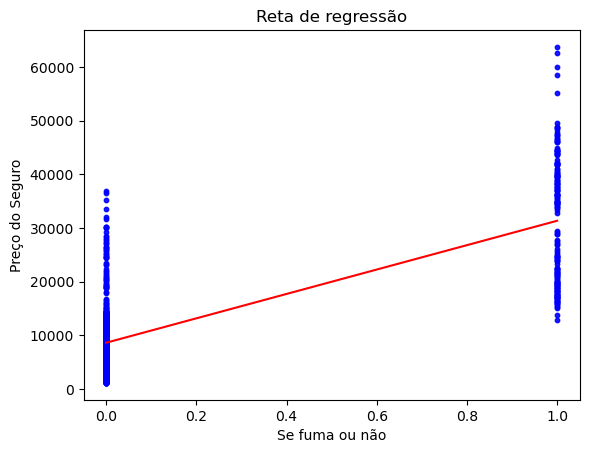

In [43]:
plt.scatter(y=y_treino, x=x_treino, color='blue', s=10, alpha=0.9) #s = tamanho da bolinha e alpha é a nitides da cor
X_plot = np.linspace(0, 1) # 3 e 9 é o valor minimo e maximo do numero de comodos
plt.plot(X_plot, X_plot*reg_linear1.coef_ + reg_linear1.intercept_, color='red') #A conta feitaé a equação apresentada a cima no titulo
plt.title('Reta de regressão')
plt.ylabel('Preço do Seguro')
plt.xlabel('Se fuma ou não')
plt.show()

In [44]:
previsoes_teste = reg_linear1.predict(x_teste)
previsoes_teste

array([ 8616.73153134,  8616.73153134, 31357.51626789,  8616.73153134,
        8616.73153134,  8616.73153134,  8616.73153134,  8616.73153134,
        8616.73153134,  8616.73153134,  8616.73153134,  8616.73153134,
        8616.73153134,  8616.73153134, 31357.51626789,  8616.73153134,
        8616.73153134,  8616.73153134,  8616.73153134, 31357.51626789,
       31357.51626789,  8616.73153134,  8616.73153134, 31357.51626789,
        8616.73153134,  8616.73153134,  8616.73153134,  8616.73153134,
        8616.73153134,  8616.73153134,  8616.73153134, 31357.51626789,
        8616.73153134,  8616.73153134, 31357.51626789,  8616.73153134,
        8616.73153134, 31357.51626789, 31357.51626789,  8616.73153134,
        8616.73153134,  8616.73153134, 31357.51626789, 31357.51626789,
       31357.51626789,  8616.73153134,  8616.73153134,  8616.73153134,
        8616.73153134,  8616.73153134,  8616.73153134,  8616.73153134,
       31357.51626789, 31357.51626789,  8616.73153134,  8616.73153134,
      

In [45]:
y_teste

array([ 9724.53    ,  8547.6913  , 45702.02235 , 12950.0712  ,
        9644.2525  ,  4500.33925 ,  2198.18985 , 11436.73815 ,
        7537.1639  ,  5425.02335 ,  6753.038   , 10493.9458  ,
        7337.748   ,  4185.0979  , 18310.742   , 10702.6424  ,
       12523.6048  ,  3490.5491  ,  6457.8434  , 33475.81715 ,
       23967.38305 , 12643.3778  , 23045.56616 , 23065.4207  ,
        1674.6323  ,  4667.60765 ,  3732.6251  ,  7682.67    ,
        3756.6216  ,  8413.46305 ,  8059.6791  , 48970.2476  ,
       12979.358   , 20630.28351 , 14571.8908  ,  4137.5227  ,
        8347.1643  , 51194.55914 , 40003.33225 ,  1880.487   ,
        5458.04645 ,  2867.1196  , 20149.3229  , 47496.49445 ,
       36149.4835  , 26018.95052 , 19749.38338 ,  6940.90985 ,
        4718.20355 , 22192.43711 ,  2899.48935 , 18838.70366 ,
       23568.272   , 46255.1125  , 24227.33724 ,  3268.84665 ,
        2322.6218  ,  8827.2099  , 14478.33015 , 13112.6048  ,
        1253.936   , 46718.16325 , 13919.8229  ,  9630.

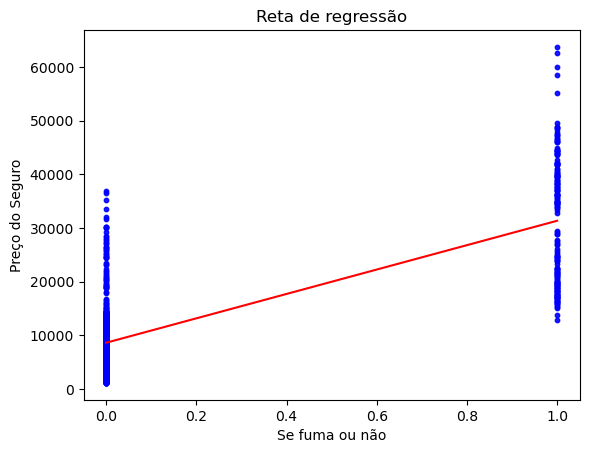

In [46]:
plt.scatter(y=y_treino, x=x_treino, color='blue', s=10, alpha=0.9) #s = tamanho da bolinha e alpha é a nitides da cor
X_plot = np.linspace(0, 1) # 3 e 9 é o valor minimo e maximo do numero de comodos
plt.plot(X_plot, X_plot*reg_linear1.coef_ + reg_linear1.intercept_, color='red') #A conta feitaé a equação apresentada a cima no titulo
plt.title('Reta de regressão')
plt.ylabel('Preço do Seguro')
plt.xlabel('Se fuma ou não')
plt.show()

In [47]:
# Fazendo previsões para valores distintos o numero entre preço do seguro para pessoas fumam quantidade de comodos da casa
valor_casa = reg_linear1.predict([[1]])

valor_casa


array([31357.51626789])

**Métricas de Desempenho**

In [48]:
# Erro absoluto
abs(y_teste - previsoes_teste).mean() #Somente valores positivos se não é erro absoluto

5626.59020410153

In [49]:
from sklearn.metrics import mean_absolute_error, mean_squared_error

In [50]:
# Erro médio absoluto
mean_absolute_error(y_teste, previsoes_teste)

5626.59020410153

In [51]:
# Raiz do erro quadrático médio
np.sqrt(mean_squared_error(y_teste, previsoes_teste)) # Será a referencia em comparação com os outros modelos

7239.670242202978

### Valor do preço (charges) em função da idade (age)

In [52]:
df.head()

,age,sex,bmi,children,smoker,region,charges
0,19,1,27.900,0,1,0,16884.92400
1,18,0,33.770,1,0,1,1725.55230
2,28,0,33.000,3,0,1,4449.46200
3,33,0,22.705,0,0,2,21984.47061
4,32,0,28.880,0,0,2,3866.85520


In [53]:
x2 = df.iloc[:, 0:1].values #Pegou todas as linhas usando o ':' mas apenas a coluna numero 1 a 2 é excluida
x2

array([[19],
       [18],
       [28],
       ...,
       [18],
       [21],
       [61]], dtype=int64)

In [54]:
y = df.iloc[:, 6].values
y

array([16884.924 ,  1725.5523,  4449.462 , ...,  1629.8335,  2007.945 ,
       29141.3603])

In [55]:
from sklearn.model_selection import train_test_split
x_treino, x_teste, y_treino, y_teste = train_test_split(x2, y, test_size = 0.3, random_state = 0)

In [56]:
x_treino.shape, y_treino.shape

((936, 1), (936,))

In [57]:
x_treino.shape, y_treino.shape

((936, 1), (936,))

In [58]:
from sklearn.linear_model import LinearRegression
reg_linear2 = LinearRegression()
reg_linear2.fit(x_treino, y_treino)


LinearRegression()

In [59]:
# Intercepto (coeficiente linear)
reg_linear2.intercept_

3883.0959727465233

In [60]:
# Coeficiente Angular
reg_linear2.coef_
#É normal ser negativo porque é uma correlação negativa pois quando o x almenta diminui o y

array([236.87730363])

**Equação: Valor = 2428,66 - 281,01.age**

In [61]:
# Coeficiente de Determinação dados de treino
reg_linear2.score(x_treino, y_treino)

0.07806233269288265

In [62]:
previsoes_treino = reg_linear2.predict(x_treino)
previsoes_treino

array([ 8146.88743817, 13121.31081451, 16200.71576176, 14305.69733268,
       11700.0469927 ,  8383.76474181,  8383.76474181, 18332.61149447,
       13595.06542178, 18569.48879811, 15016.32924358, 16674.47036903,
       18806.36610174,  9094.39665271, 14542.57463631,  8857.51934908,
       17858.8568872 ,  8857.51934908, 12884.43351087,  8146.88743817,
       17621.97958357, 12647.55620724, 17385.10227993, 15253.20654722,
       12410.6789036 ,  9094.39665271, 11700.0469927 , 17385.10227993,
       14779.45193995,  9094.39665271, 15253.20654722, 10752.53777816,
       15726.96115449, 14068.82002904, 10752.53777816, 10752.53777816,
       15726.96115449, 13358.18811814,  9805.02856362,  8620.64204544,
        9805.02856362,  8383.76474181, 10515.66047452, 16200.71576176,
        8146.88743817, 15726.96115449, 14779.45193995,  9805.02856362,
        9094.39665271, 15016.32924358, 15253.20654722, 14542.57463631,
       17385.10227993, 11226.29238543,  9094.39665271,  8620.64204544,
      

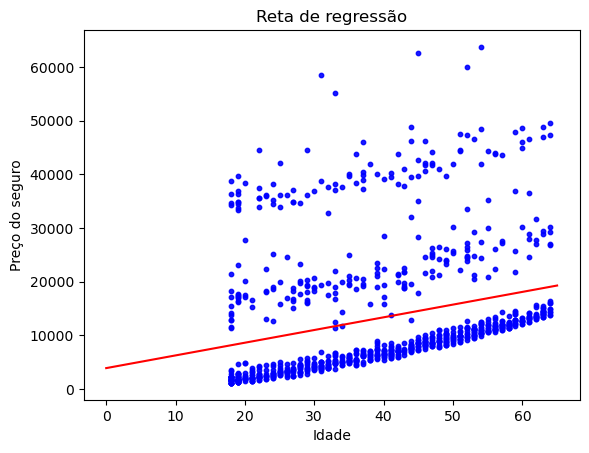

In [63]:
plt.scatter(y=y_treino, x=x_treino, color='blue', s=10, alpha=0.9)
X_plot = np.linspace(0, 65)
plt.plot(X_plot, X_plot*reg_linear2.coef_ + reg_linear2.intercept_, color='r')
plt.title('Reta de regressão')
plt.ylabel('Preço do seguro')
plt.xlabel('Idade')
plt.show()

In [64]:
previsoes_teste = reg_linear2.predict(x_teste)
previsoes_teste

array([16200.71576176, 15016.32924358, 15253.20654722, 18332.61149447,
       15963.83845812, 11936.92429633,  8146.88743817, 15963.83845812,
       12884.43351087, 11226.29238543, 11936.92429633, 15726.96115449,
       14068.82002904, 11700.0469927 , 10278.78317089, 15726.96115449,
       18095.73419084, 10041.90586725, 12884.43351087,  8620.64204544,
       15963.83845812, 17148.2249763 , 16200.71576176, 15016.32924358,
        9094.39665271, 11463.16968906, 10515.66047452, 13358.18811814,
       11226.29238543, 14542.57463631, 13358.18811814, 17858.8568872 ,
       18569.48879811, 16911.34767266,  9568.15125998, 10989.41508179,
       14779.45193995, 10515.66047452, 13358.18811814,  8620.64204544,
       12410.6789036 , 10752.53777816, 13121.31081451, 17621.97958357,
        8146.88743817,  8857.51934908, 15726.96115449, 13831.94272541,
       10989.41508179, 17385.10227993,  9331.27395635,  8383.76474181,
       15253.20654722, 15963.83845812, 17621.97958357, 10515.66047452,
      

In [65]:
reg_linear2.score(x_teste, y_teste)

0.11069633109427401

In [66]:
# Fazendo previsões para valores distintos
preco_seguro = reg_linear2.predict([[55]])
preco_seguro

array([16911.34767266])

**Metricas de desempenho**

In [67]:
# Erro absoluto
abs(y_teste - previsoes_teste).mean() #Todos tenque ser positivo

9276.286226245093

In [68]:
from sklearn.metrics import mean_absolute_error, mean_squared_error

In [69]:
# Erro quadrático médio
mean_squared_error(y_teste, previsoes_teste)

141816780.40039894

In [70]:
# Raiz do erro quadrático médio (age
np.sqrt(mean_squared_error(y_teste, previsoes_teste))

11908.685082762031

### **Validação Cruzada**

In [71]:
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score

In [72]:
# Separando os dados em folds
kfold = KFold(n_splits = 15, shuffle=True, random_state = 0)

In [73]:
# Criando o modelo
from sklearn.linear_model import LinearRegression
modelo = LinearRegression()
resultado = cross_val_score(modelo, x2, y, cv = kfold)
resultado

array([ 0.02497954,  0.17730333,  0.14864947,  0.08528575,  0.01305298,
       -0.02508939,  0.0854753 ,  0.16998512,  0.14041322,  0.02415805,
        0.01300496,  0.05703038,  0.02330095,  0.1389627 ,  0.06615223])

In [74]:
# Usamos a média e o desvio padrão
print("Coef. determinação Médio: %.2f%%" % (resultado.mean() * 100.0))

Coef. determinação Médio: 7.62%


## **Avaliando a Regreção Linear Simples com Statsmodels**

In [75]:
import statsmodels.formula.api as smf

In [76]:
import matplotlib.pyplot as pl

In [77]:
df.head(2)

,age,sex,bmi,children,smoker,region,charges
0,19,1,27.90,0,1,0,16884.9240
1,18,0,33.77,1,0,1,1725.5523


In [78]:
x2 = df.iloc[:,0:1].values
x2

array([[19],
       [18],
       [28],
       ...,
       [18],
       [21],
       [61]], dtype=int64)

In [79]:
y = df.iloc[:, 6].values
y

array([16884.924 ,  1725.5523,  4449.462 , ...,  1629.8335,  2007.945 ,
       29141.3603])

In [80]:
#Criação do modelo
regressao = smf.ols('y ~ x2', data = df).fit()

In [81]:
residuos = regressao.resid
residuos

0        8822.309239
1       -6079.339842
2       -5932.656329
3       10313.739188
4       -7546.153603
            ...     
1333    -5451.467639
1334    -5598.911342
1335    -6175.058642
1336    -6570.114998
1337    10254.395555
Length: 1338, dtype: float64

**Teste de Normalidade**

In [82]:
estatistica, p = stats.shapiro(residuos)
print('Estatistica de teste: {}'.format(estatistica))
print('p-valor: {}'.format(p)) #Se p-valor é menorque 0.05 a distribuição é anormal

Estatistica de teste: 0.6577351093292236
p-valor: 1.401298464324817e-45


In [83]:
import scipy.stats as stats

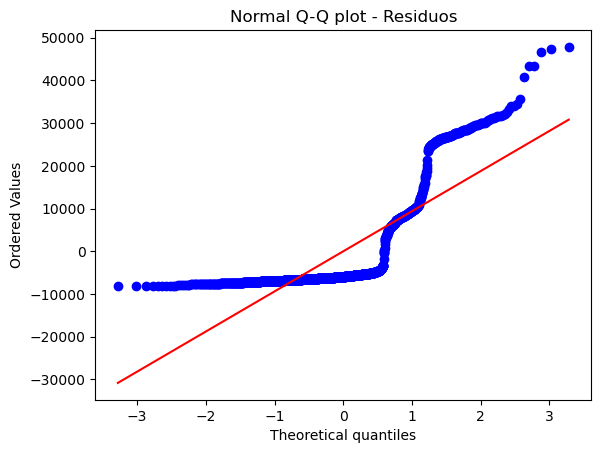

In [84]:
stats.probplot(residuos, dist="norm", plot=plt)
plt.title("Normal Q-Q plot - Residuos")
plt.show()

Ho = existe homocedasticidade: p > 0.05
Ha = não existe homocedasticidade: p <= 0.05

In [85]:
from statsmodels.compat import lzip
import statsmodels.stats.api as sms

In [86]:
estatistica, p, f, fp = sms.het_breuschpagan (regressao.resid, regressao.model.exog)
print('Estatística de teste: {}'.format(estatistica))
print('p-valor: {}'.format(p))
print('f-valor: {}'.format(f))
print('f_p-valor: {}'.format(fp))

Estatística de teste: 0.0004134966681730301
p-valor: 0.9837764407329392
f-valor: 0.0004128787140921974
f_p-valor: 0.9837916004512588


**Outliers nos residuos**

(Entre -3 e 3)

In [87]:
outliers = regressao.outlier_test()

In [88]:
outliers.max() #O maximo é 3 mas o resultado foi 4.281495

student_resid    4.164437
unadj_p          0.999514
bonf(p)          1.000000
dtype: float64

In [89]:
outliers.min()

student_resid   -0.697265
unadj_p          0.000033
bonf(p)          0.044441
dtype: float64

Modelo não consistente

**Modelo de Regressão Linear**

In [90]:
print(regressao.summary())

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.089
Model:                            OLS   Adj. R-squared:                  0.089
Method:                 Least Squares   F-statistic:                     131.2
Date:                Tue, 19 Dec 2023   Prob (F-statistic):           4.89e-29
Time:                        12:46:21   Log-Likelihood:                -14415.
No. Observations:                1338   AIC:                         2.883e+04
Df Residuals:                    1336   BIC:                         2.884e+04
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept   3165.8850    937.149      3.378      0.0

In [91]:
coefs = pd.DataFrame(regressao.params)
coefs.columns = ['Coeficientes']
print(coefs)

           Coeficientes
Intercept   3165.885006
x2           257.722619


**Equação com valor: 8434,26 23615,96.age**

In [92]:
regressao.params

Intercept    3165.885006
x2            257.722619
dtype: float64

In [93]:
df.head()

,age,sex,bmi,children,smoker,region,charges
0,19,1,27.900,0,1,0,16884.92400
1,18,0,33.770,1,0,1,1725.55230
2,28,0,33.000,3,0,1,4449.46200
3,33,0,22.705,0,0,2,21984.47061
4,32,0,28.880,0,0,2,3866.85520


In [94]:
regressao.predict()

array([ 8062.61476073,  7804.89214207, 10382.11832874, ...,
        7804.89214207,  8578.05999807, 18886.96474474])

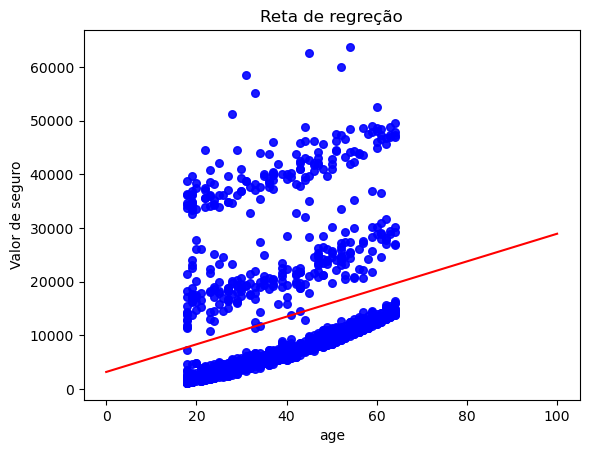

In [95]:
plt.scatter(y=df.charges, x=df.age, color='blue', s=30, alpha=0.9)
X_plot = np.linspace(0, 100) # de 0 a 100 o valor de X
plt.plot(X_plot, X_plot*regressao.params[1] + regressao.params[0], color='r') #regressao.params[1] = x2 e regressao.params[0] é Intercept
plt.title('Reta de regreção')
plt.ylabel('Valor de seguro')
plt.xlabel('age')
plt.show()

## **REGRESSÃO LINEAR MÚLTIPLA**

In [96]:
df.head(2)

,age,sex,bmi,children,smoker,region,charges
0,19,1,27.90,0,1,0,16884.9240
1,18,0,33.77,1,0,1,1725.5523


In [97]:
independente = df.iloc[:, 0:6].values # Selecionou as colunas 1 2 e 3
independente

array([[19.  ,  1.  , 27.9 ,  0.  ,  1.  ,  0.  ],
       [18.  ,  0.  , 33.77,  1.  ,  0.  ,  1.  ],
       [28.  ,  0.  , 33.  ,  3.  ,  0.  ,  1.  ],
       ...,
       [18.  ,  1.  , 36.85,  0.  ,  0.  ,  1.  ],
       [21.  ,  1.  , 25.8 ,  0.  ,  0.  ,  0.  ],
       [61.  ,  1.  , 29.07,  0.  ,  1.  ,  2.  ]])

In [98]:
independente.shape

(1338, 6)

In [99]:
dependente = df.iloc[:, 6].values
dependente

array([16884.924 ,  1725.5523,  4449.462 , ...,  1629.8335,  2007.945 ,
       29141.3603])

In [100]:
from sklearn.model_selection import train_test_split
x_treino, x_teste, y_treino, y_teste = train_test_split(independente, dependente, test_size = 0.3, random_state = 0)

In [101]:
x_treino.shape, x_teste.shape

((936, 6), (402, 6))

In [102]:
multipla = LinearRegression()
multipla.fit(x_treino, y_treino)

LinearRegression()

In [103]:
multipla.intercept_

-12706.07275161775

In [104]:
multipla.coef_ # Cada resultado para cada coluna

array([  256.5772619 ,    49.39232379,   329.02381564,   479.08499828,
       23400.28378787,   276.31576201])

In [105]:
print("Equação: Valor = {:.2f} + ({:.2f})*age + ({:.2f})*sex + ({:.2f})*bmi + ({:.2f})*children + ({:.2f})*smoker + ({:.2f})*region".format(multipla.intercept_, multipla.coef_[0], multipla.coef_[1], multipla.coef_[2], multipla.coef_[3], multipla.coef_[4], multipla.coef_[5]))

Equação: Valor = -12706.07 + (256.58)*age + (49.39)*sex + (329.02)*bmi + (479.08)*children + (23400.28)*smoker + (276.32)*region


In [106]:
# Coeficiente de Determinação
multipla.score(x_treino, y_treino)

0.7306840408360217

**TESTE**

In [107]:
previsoes = multipla.predict(x_teste)
previsoes

array([11051.54909755,  9821.28110689, 37867.57220923, 16125.70579228,
        6920.27132517,  3879.38549816,  1448.91928088, 14390.17797974,
        9022.95151353,  7458.83371884,  4584.60125463, 10309.9886336 ,
        8693.03891958,  4085.25393494, 27551.60737718, 11151.0640722 ,
       11243.0536825 ,  5962.9521121 ,  8181.9015666 , 26750.7993431 ,
       33448.59842228, 14350.03320383, 11672.89478465, 32235.7832204 ,
        4326.07702625,  9096.53607025,  1045.25196369, 10177.76672094,
        4042.60346751, 10384.28681219,  9035.98983755, 40123.71002379,
       15507.20819083, 13678.264976  , 24481.97362849,  5059.21988589,
       12889.80609711, 30333.92625689, 33301.25091403,  3431.35787088,
        3941.81614597,  4203.90901434, 30219.19050725, 39245.56885373,
       27762.83744249,  4994.74188765, 11042.48621304,  7760.15047885,
        3569.09734756, 10613.61535955,  5544.95921408,  3397.80923785,
       32701.67144343, 38285.57836702, 16290.50463759,  6965.99677468,
      

In [108]:
y_teste

array([ 9724.53    ,  8547.6913  , 45702.02235 , 12950.0712  ,
        9644.2525  ,  4500.33925 ,  2198.18985 , 11436.73815 ,
        7537.1639  ,  5425.02335 ,  6753.038   , 10493.9458  ,
        7337.748   ,  4185.0979  , 18310.742   , 10702.6424  ,
       12523.6048  ,  3490.5491  ,  6457.8434  , 33475.81715 ,
       23967.38305 , 12643.3778  , 23045.56616 , 23065.4207  ,
        1674.6323  ,  4667.60765 ,  3732.6251  ,  7682.67    ,
        3756.6216  ,  8413.46305 ,  8059.6791  , 48970.2476  ,
       12979.358   , 20630.28351 , 14571.8908  ,  4137.5227  ,
        8347.1643  , 51194.55914 , 40003.33225 ,  1880.487   ,
        5458.04645 ,  2867.1196  , 20149.3229  , 47496.49445 ,
       36149.4835  , 26018.95052 , 19749.38338 ,  6940.90985 ,
        4718.20355 , 22192.43711 ,  2899.48935 , 18838.70366 ,
       23568.272   , 46255.1125  , 24227.33724 ,  3268.84665 ,
        2322.6218  ,  8827.2099  , 14478.33015 , 13112.6048  ,
        1253.936   , 46718.16325 , 13919.8229  ,  9630.

In [109]:
# Coeficiente de Determinação
multipla.score(x_teste, y_teste)

0.7911113876316933

In [110]:
# Fazendo previsões para valores distintos
preco_seguro = multipla.predict([[18,0,22,0, 0, 2]])
preco_seguro

array([-296.52656941])

In [111]:
df.head()

,age,sex,bmi,children,smoker,region,charges
0,19,1,27.900,0,1,0,16884.92400
1,18,0,33.770,1,0,1,1725.55230
2,28,0,33.000,3,0,1,4449.46200
3,33,0,22.705,0,0,2,21984.47061
4,32,0,28.880,0,0,2,3866.85520


**MÉTRICAS**

In [112]:
# Erro absoluto / Só é erro se ovalor for negativo
abs(y_teste - previsoes).mean()

4013.692985781206

In [113]:
from sklearn.metrics import mean_absolute_error, mean_squared_error

In [114]:
# Erro médio Absoluto
mean_absolute_error(y_teste, previsoes)

4013.692985781206

In [115]:
# Erro quadrático médio
mean_squared_error(y_teste, previsoes)

33311355.281859964

In [116]:
# Raiz do erro quadrático médio
np.sqrt(mean_squared_error(y_teste, previsoes))

5771.599022962351

### **Validação Cruzada**

In [117]:
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score

In [118]:
# Separando os dados em folds
kfold = KFold(n_splits = 15, shuffle=True, random_state = 0)

In [119]:
# Criando o modelo
from sklearn.linear_model import LinearRegression
modelo = LinearRegression()
resultado = cross_val_score(modelo, independente, dependente, cv = kfold)
resultado

array([0.78908005, 0.80792814, 0.80189673, 0.77929766, 0.76845972,
       0.77591112, 0.5743124 , 0.75446734, 0.62569644, 0.80336534,
       0.73032487, 0.72751453, 0.69667834, 0.70761061, 0.72958741])

In [120]:
# Usamos a média e o desvio padrão
print("Coeficiente de Determinação Médio: %.2f%%" % (resultado.mean() * 100.0))

Coeficiente de Determinação Médio: 73.81%


## **Avaliando a Regressão Linear Múltipla com Statsmodels**

In [121]:
import statsmodels.formula.api as smf
import statsmodels.stats.api as sms

In [122]:
df.head()

,age,sex,bmi,children,smoker,region,charges
0,19,1,27.900,0,1,0,16884.92400
1,18,0,33.770,1,0,1,1725.55230
2,28,0,33.000,3,0,1,4449.46200
3,33,0,22.705,0,0,2,21984.47061
4,32,0,28.880,0,0,2,3866.85520


In [123]:
#Criação do modelo
modelo = smf.ols('charges ~ age + sex + bmi + children + smoker + region',data=df).fit()

In [124]:
residuos = modelo.resid
residuos

0       -8226.317864
1       -1962.052873
2       -2513.683707
3       18243.162205
4       -1670.785697
            ...     
1333    -1701.457702
1334    -1225.390847
1335    -2733.828866
1336      900.958387
1337    -7872.367796
Length: 1338, dtype: float64

**Teste de Normalidade dos resíduos**

In [125]:
import scipy.stats as stats

Ho = distribuição normal: p > 0.05
Ha = distribuição não normal: p <= 0.05

In [126]:
estatistica, p = stats.shapiro(residuos)
print('Estatistica de teste: {}'.format(estatistica))
print('p-valor: {}'.format(p)) #Se p-valor é menorque 0.05 a distribuição é anormal

Estatistica de teste: 0.8990615606307983
p-valor: 8.660521172067415e-29


In [127]:
import matplotlib.pyplot as plt

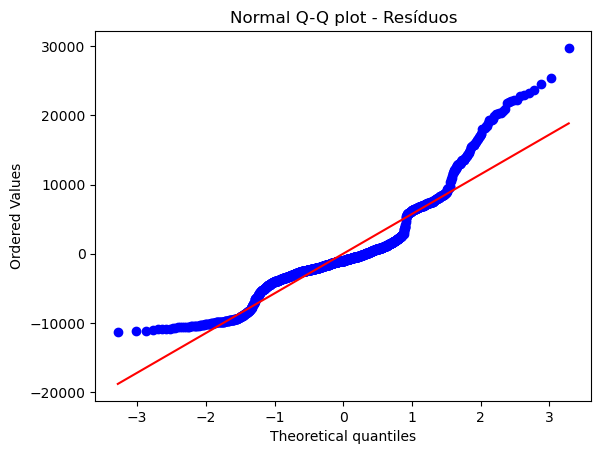

In [128]:
stats.probplot(residuos, dist="norm", plot=plt)
plt.title("Normal Q-Q plot - Resíduos")
plt.show()

Ho = distribuição normal: p > 0.05
Ha = distribuição não normal: p <= 0.05

In [129]:
from statsmodels.compat import lzip

In [130]:
estatistica, p, f, fp = sms.het_breuschpagan (modelo.resid, modelo.model.exog)
print('Estatística de teste: {}'.format(estatistica))
print('p-valor: {}'.format(p))
print('f-valor: {}'.format(f))
print('f_p-valor: {}'.format(fp))

Estatística de teste: 122.0290172177658
p-valor: 6.106679472277846e-24
f-valor: 22.262129636407327
f_p-valor: 4.365890698384527e-25


**Outliers nos resíduos**

In [131]:
outliers = modelo.outlier_test()

In [132]:
outliers.max()

student_resid    4.966191
unadj_p          0.999820
bonf(p)          1.000000
dtype: float64

In [133]:
outliers.min()

student_resid   -1.880403e+00
unadj_p          7.713955e-07
bonf(p)          1.032127e-03
dtype: float64

## Ausência de Multicolinearidade

Somente entre variaveis independentes

Considerada multicolinearidade quando r > 0.9

In [134]:
variaveis = df[['age','sex','bmi','children','smoker','region']]

In [135]:
variaveis.head()

,age,sex,bmi,children,smoker,region
0,19,1,27.900,0,1,0
1,18,0,33.770,1,0,1
2,28,0,33.000,3,0,1
3,33,0,22.705,0,0,2
4,32,0,28.880,0,0,2


In [136]:
correlacao = variaveis.corr(method='pearson')
correlacao

,age,sex,bmi,children,smoker,region
age,1.000000,0.020856,0.109272,0.042469,-0.025019,-0.002127
sex,0.020856,1.000000,-0.046371,-0.017163,-0.076185,0.004588
bmi,0.109272,-0.046371,1.000000,0.012759,0.003750,-0.157566
children,0.042469,-0.017163,0.012759,1.000000,0.007673,-0.016569
smoker,-0.025019,-0.076185,0.003750,0.007673,1.000000,0.002181
region,-0.002127,0.004588,-0.157566,-0.016569,0.002181,1.000000


**Análise do Modelo**

In [137]:
print(modelo.summary())

                            OLS Regression Results                            
Dep. Variable:                charges   R-squared:                       0.751
Model:                            OLS   Adj. R-squared:                  0.750
Method:                 Least Squares   F-statistic:                     668.1
Date:                Tue, 19 Dec 2023   Prob (F-statistic):               0.00
Time:                        12:46:24   Log-Likelihood:                -13548.
No. Observations:                1338   AIC:                         2.711e+04
Df Residuals:                    1331   BIC:                         2.715e+04
Df Model:                           6                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept  -1.301e+04   1025.707    -12.681      0.0

In [138]:
#Criando uma coluna com previsão
df['previsao'] = modelo.fittedvalues

In [139]:
df.head()

,age,sex,bmi,children,smoker,region,charges,previsao
0,19,1,27.900,0,1,0,16884.92400,25111.241864
1,18,0,33.770,1,0,1,1725.55230,3687.605173
2,28,0,33.000,3,0,1,4449.46200,6963.145707
3,33,0,22.705,0,0,2,21984.47061,3741.308405
4,32,0,28.880,0,0,2,3866.85520,5537.640897


In [140]:
import seaborn as sns

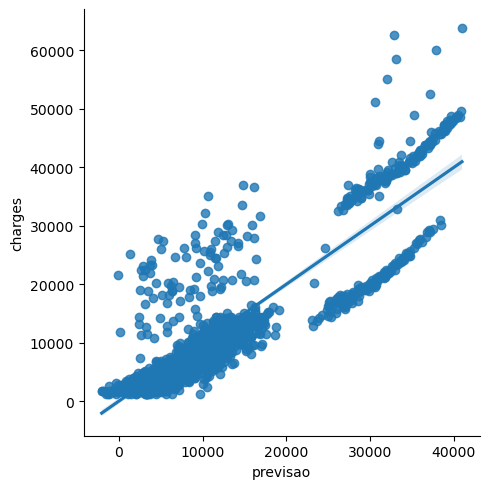

In [141]:
sns.lmplot(x='previsao', y='charges', data=df)

## **REGRESSÃO POLINOMIAL**

Valor médio (charge) em função do fumo (smoke)

In [142]:
df.head(2)

,age,sex,bmi,children,smoker,region,charges,previsao
0,19,1,27.90,0,1,0,16884.9240,25111.241864
1,18,0,33.77,1,0,1,1725.5523,3687.605173


In [187]:
x1 = df.iloc[:,4:5].values
x1

array([[1],
       [0],
       [0],
       ...,
       [0],
       [0],
       [1]], dtype=int64)

In [188]:
y = df.iloc[:, 6].values
y

array([16884.924 ,  1725.5523,  4449.462 , ...,  1629.8335,  2007.945 ,
       29141.3603])

In [189]:
from sklearn.model_selection import train_test_split
x_treino, x_teste, y_treino, y_teste = train_test_split(x1, y, test_size = 0.3, random_state = 0)

In [190]:
x_treino.shape, y_treino.shape

((936, 1), (936,))

In [191]:
x_teste.shape, y_teste.shape

((402, 1), (402,))

In [192]:
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression

In [193]:
# Pré Processamento
grau_polinomial =PolynomialFeatures(degree=2)

In [194]:
x_poly = grau_polinomial.fit_transform(x_treino)
x_poly

array([[1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       ...,
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.]])

In [195]:
polinomial = LinearRegression()

In [196]:
polinomial.fit(x_poly, y_treino)

LinearRegression()

In [197]:
previsoes_treino = polinomial.predict(x_poly)

In [198]:
polinomial.coef_

array([ 0.00000000e+00,  4.39659353e+16, -4.39659353e+16])

In [199]:
polinomial.intercept_

8667.916467179486

**Equação:**

Valor = 8667.91 - 4.39*smoke + -4.39659353e+16*smoke^2

In [156]:
numeros = np.linspace(18,64,342) #Ela criou uma lista de 342 numeros de 3 até 9,84  3 é o numero minimo aproximado de casas e o 9,84 é o numero maximo de comodos
numeros

array([18.        , 18.13489736, 18.26979472, 18.40469208, 18.53958944,
       18.6744868 , 18.80938416, 18.94428152, 19.07917889, 19.21407625,
       19.34897361, 19.48387097, 19.61876833, 19.75366569, 19.88856305,
       20.02346041, 20.15835777, 20.29325513, 20.42815249, 20.56304985,
       20.69794721, 20.83284457, 20.96774194, 21.1026393 , 21.23753666,
       21.37243402, 21.50733138, 21.64222874, 21.7771261 , 21.91202346,
       22.04692082, 22.18181818, 22.31671554, 22.4516129 , 22.58651026,
       22.72140762, 22.85630499, 22.99120235, 23.12609971, 23.26099707,
       23.39589443, 23.53079179, 23.66568915, 23.80058651, 23.93548387,
       24.07038123, 24.20527859, 24.34017595, 24.47507331, 24.60997067,
       24.74486804, 24.8797654 , 25.01466276, 25.14956012, 25.28445748,
       25.41935484, 25.5542522 , 25.68914956, 25.82404692, 25.95894428,
       26.09384164, 26.228739  , 26.36363636, 26.49853372, 26.63343109,
       26.76832845, 26.90322581, 27.03812317, 27.17302053, 27.30

In [157]:
numeros.shape

(342,)

In [158]:
valor = 8667.91 - 4.39*numeros + -4.39659353e+16*numeros**2

In [159]:
import matplotlib.pyplot as plt

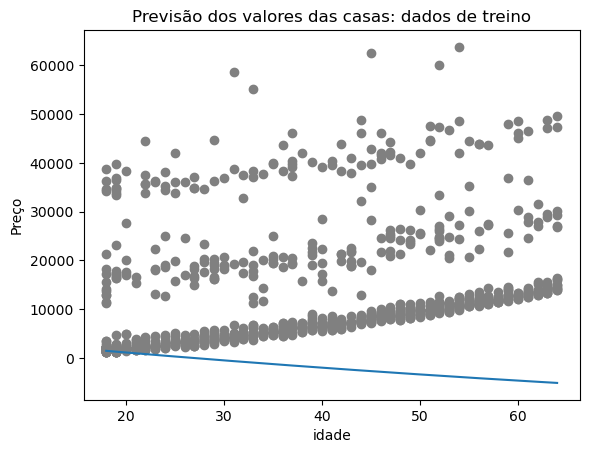

In [160]:
plt.scatter(x_treino, y_treino, c = "gray")
plt.xlabel("idade")
plt.ylabel("Preço")
plt.title("Previsão dos valores das casas: dados de treino")
plt.plot(numeros, valor);

**Teste**

In [204]:
numeros2 = np.linspace(0,1,147)
numeros2

array([0.        , 0.00684932, 0.01369863, 0.02054795, 0.02739726,
       0.03424658, 0.04109589, 0.04794521, 0.05479452, 0.06164384,
       0.06849315, 0.07534247, 0.08219178, 0.0890411 , 0.09589041,
       0.10273973, 0.10958904, 0.11643836, 0.12328767, 0.13013699,
       0.1369863 , 0.14383562, 0.15068493, 0.15753425, 0.16438356,
       0.17123288, 0.17808219, 0.18493151, 0.19178082, 0.19863014,
       0.20547945, 0.21232877, 0.21917808, 0.2260274 , 0.23287671,
       0.23972603, 0.24657534, 0.25342466, 0.26027397, 0.26712329,
       0.2739726 , 0.28082192, 0.28767123, 0.29452055, 0.30136986,
       0.30821918, 0.31506849, 0.32191781, 0.32876712, 0.33561644,
       0.34246575, 0.34931507, 0.35616438, 0.3630137 , 0.36986301,
       0.37671233, 0.38356164, 0.39041096, 0.39726027, 0.40410959,
       0.4109589 , 0.41780822, 0.42465753, 0.43150685, 0.43835616,
       0.44520548, 0.45205479, 0.45890411, 0.46575342, 0.47260274,
       0.47945205, 0.48630137, 0.49315068, 0.5       , 0.50684

In [205]:
numeros2.shape

(147,)

In [206]:
valor2 = 8667.91 - 4.39*numeros2 + -4.39659353e+16*numeros2**2

In [207]:
import matplotlib.pyplot as plt

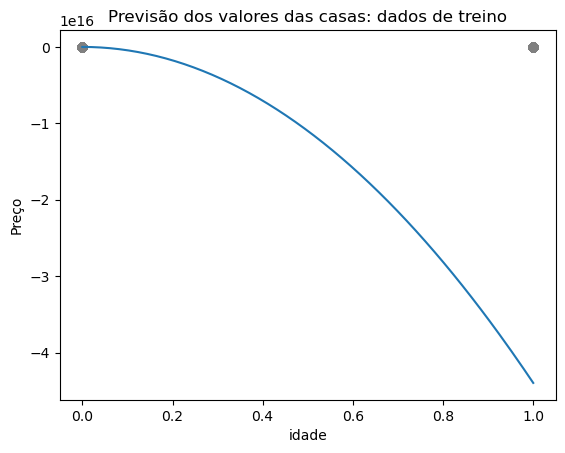

In [208]:
plt.scatter(x_treino, y_treino, c = "gray")
plt.xlabel("idade")
plt.ylabel("Preço")
plt.title("Previsão dos valores das casas: dados de treino")
plt.plot(numeros2, valor2);

In [209]:
x_poly_teste = grau_polinomial.fit_transform(x_teste)
x_poly_teste

array([[1., 0., 0.],
       [1., 0., 0.],
       [1., 1., 1.],
       ...,
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.]])

In [210]:
polinomial_teste = LinearRegression()

In [211]:
polinomial_teste.fit(x_poly_teste, y_teste)

LinearRegression()

In [212]:
# Coeficiente de Determinação dados de teste
polinomial.score(x_poly_teste, y_teste)

0.6697599831963439

In [213]:
previsoes_teste = polinomial_teste.predict(x_poly_teste)

**MÉTRICAS**

In [215]:
from sklearn.metrics import mean_absolute_error, mean_squared_error

In [216]:
# Erro médio Absoluto
mean_absolute_error(y_teste, previsoes_teste)

5447.797492169822

In [218]:
# Erro quadrático médio
mean_squared_error(y_teste, previsoes_teste)

51051601.919528395

In [219]:
# Raiz do erro quadrático médio (RMSE)
np.sqrt(mean_squared_error(y_teste, previsoes_teste))

7145.040372141251

## **REGRESSÃO COM ÁRVORE DE DECISÃO**

In [220]:
df.head(2)

,age,sex,bmi,children,smoker,region,charges,previsao
0,19,1,27.90,0,1,0,16884.9240,25111.241864
1,18,0,33.77,1,0,1,1725.5523,3687.605173


In [222]:
independente = df.iloc[:, 0:6].values
independente

array([[19.  ,  1.  , 27.9 ,  0.  ,  1.  ,  0.  ],
       [18.  ,  0.  , 33.77,  1.  ,  0.  ,  1.  ],
       [28.  ,  0.  , 33.  ,  3.  ,  0.  ,  1.  ],
       ...,
       [18.  ,  1.  , 36.85,  0.  ,  0.  ,  1.  ],
       [21.  ,  1.  , 25.8 ,  0.  ,  0.  ,  0.  ],
       [61.  ,  1.  , 29.07,  0.  ,  1.  ,  2.  ]])

In [223]:
independente.shape

(1338, 6)

In [224]:
dependente = df.iloc[:, 6].values #Para descobrir se é 1D ou 2D basta olhar se tem couchetes dentro de couchetes
dependente

array([16884.924 ,  1725.5523,  4449.462 , ...,  1629.8335,  2007.945 ,
       29141.3603])

In [225]:
dependente.shape

(1338,)

In [226]:
from sklearn.model_selection import train_test_split
x_treino, x_teste, y_treino, y_teste = train_test_split(independente, dependente, test_size = 0.3, random_state = 0)

In [227]:
x_treino.shape, x_teste.shape

((936, 6), (402, 6))

In [228]:
y_treino.shape, y_teste.shape

((936,), (402,))

In [235]:
from sklearn.tree import DecisionTreeRegressor
arvore = DecisionTreeRegressor(max_depth=5, random_state=10) #max_depth é ajustagem
arvore.fit(x_treino, y_treino)
#Caso o valor de arvore.score for muito alto tenque tomar cuidade com overfiting e para verificar os valores .score de treino e teste tenque estar proximos

DecisionTreeRegressor(max_depth=5, random_state=10)

In [232]:
arvore.score(x_treino, y_treino)

0.8530071656927247

**TESTE**

In [236]:
arvore.score(x_teste, y_teste)

0.8239135295086505

In [237]:
previsoes_teste = arvore.predict(x_teste)
previsoes_teste

array([11839.80721163,  9258.80334932, 41896.67127447, 15240.29968833,
       11564.04733484,  7125.37182402,  3064.76344858,  9258.80334932,
        7125.37182402,  7125.37182402,  7125.37182402, 11564.04733484,
        9258.80334932,  5217.35429405, 19099.57786744,  9258.80334932,
       15240.29968833,  4528.30711673,  7125.37182402, 33705.2506    ,
       24582.06236882, 14800.61554821, 11839.80721163, 26745.56683125,
        3064.76344858,  7125.37182402,  7125.37182402,  7589.23995085,
        5217.35429405,  9258.80334932,  7125.37182402, 46847.68208429,
       15240.29968833, 11839.80721163, 19099.57786744,  7125.37182402,
        9258.80334932, 41405.620994  , 41896.67127447,  3064.76344858,
        7125.37182402,  5217.35429405, 19099.57786744, 46847.68208429,
       37517.02964286,  3064.76344858,  9258.80334932,  7125.37182402,
        7125.37182402, 11839.80721163,  4528.30711673,  3064.76344858,
       26745.56683125, 46847.68208429, 11839.80721163,  7125.37182402,
      

In [238]:
y_teste

array([ 9724.53    ,  8547.6913  , 45702.02235 , 12950.0712  ,
        9644.2525  ,  4500.33925 ,  2198.18985 , 11436.73815 ,
        7537.1639  ,  5425.02335 ,  6753.038   , 10493.9458  ,
        7337.748   ,  4185.0979  , 18310.742   , 10702.6424  ,
       12523.6048  ,  3490.5491  ,  6457.8434  , 33475.81715 ,
       23967.38305 , 12643.3778  , 23045.56616 , 23065.4207  ,
        1674.6323  ,  4667.60765 ,  3732.6251  ,  7682.67    ,
        3756.6216  ,  8413.46305 ,  8059.6791  , 48970.2476  ,
       12979.358   , 20630.28351 , 14571.8908  ,  4137.5227  ,
        8347.1643  , 51194.55914 , 40003.33225 ,  1880.487   ,
        5458.04645 ,  2867.1196  , 20149.3229  , 47496.49445 ,
       36149.4835  , 26018.95052 , 19749.38338 ,  6940.90985 ,
        4718.20355 , 22192.43711 ,  2899.48935 , 18838.70366 ,
       23568.272   , 46255.1125  , 24227.33724 ,  3268.84665 ,
        2322.6218  ,  8827.2099  , 14478.33015 , 13112.6048  ,
        1253.936   , 46718.16325 , 13919.8229  ,  9630.

**MÉTRICAS**

In [240]:
from sklearn.metrics import mean_absolute_error, mean_squared_error

In [241]:
# Erro médio Absoluto
mean_absolute_error(y_teste, previsoes_teste)

2842.520103410798

In [242]:
# Erro quadrático médio
mean_squared_error(y_teste, previsoes_teste)

28080415.262292475

In [243]:
# Raiz do erro quadrático médio (RMSE)
np.sqrt(mean_squared_error(y_teste, previsoes_teste))

5299.095702314922

### **Validação Cruzada**

In [245]:
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score

In [246]:
# Separando os dados em folds
kfold = KFold(n_splits = 15, shuffle=True, random_state = 5)

In [250]:
# Criando o modelo
from sklearn.tree import DecisionTreeRegressor
modelo = DecisionTreeRegressor(max_depth=5, random_state= 10)
resultado = cross_val_score(modelo, independente, dependente, cv = kfold)
resultado

array([0.91127325, 0.81901877, 0.88672059, 0.7692046 , 0.87075135,
       0.76383865, 0.9013885 , 0.63250802, 0.85136365, 0.8305891 ,
       0.80959701, 0.86454659, 0.86038145, 0.8424176 , 0.84221843])

In [251]:
print("Coeficiente de Determinação Médio: %.2f%%" % (resultado.mean() * 100.0))

Coeficiente de Determinação Médio: 83.04%


# **Salvando dados para Deploy**

In [252]:
independente = df.iloc[:, 0:6].values
independente

array([[19.  ,  1.  , 27.9 ,  0.  ,  1.  ,  0.  ],
       [18.  ,  0.  , 33.77,  1.  ,  0.  ,  1.  ],
       [28.  ,  0.  , 33.  ,  3.  ,  0.  ,  1.  ],
       ...,
       [18.  ,  1.  , 36.85,  0.  ,  0.  ,  1.  ],
       [21.  ,  1.  , 25.8 ,  0.  ,  0.  ,  0.  ],
       [61.  ,  1.  , 29.07,  0.  ,  1.  ,  2.  ]])

In [253]:
independente.shape

(1338, 6)

In [254]:
dependente = df.iloc[:, 6].values #Para descobrir se é 1D ou 2D basta olhar se tem couchetes dentro de couchetes
dependente

array([16884.924 ,  1725.5523,  4449.462 , ...,  1629.8335,  2007.945 ,
       29141.3603])

In [255]:
dependente.shape

(1338,)

In [256]:
np.savetxt('dados/independente.csv', independente, delimiter=',')

In [257]:
np.savetxt('dados/dependente.csv', dependente, delimiter=',')